# Table of Contents
* [Comparison of Hi-C experiments](#Comparison-of-Hi-C-experiments)
	* [Between conditions](#Between-conditions)
		* [HindIII](#HindIII)
		* [NcoI](#NcoI)
	* [Between replicates with different restriction enzymes](#Between-replicates-with-different-restriction-enzymes)
		* [T0](#T0)
		* [T60](#T60)
* [Merge Hi-C experiments](#Merge-Hi-C-experiments)


# Comparison of Hi-C experiments

In [32]:
from pytadbit.mapping.analyze import eig_correlate_matrices, correlate_matrices
from pytadbit import load_hic_data_from_reads
from matplotlib import pyplot as plt

In [33]:
reso = 200000

## Between conditions

### HindIII

In [34]:
renz1 = 'HindIII'
renz2 = 'HindIII'
rep1  = 'T0'
rep2  = 'T60'

In [35]:
hic_data1 = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz1, rep1),
    resolution=reso)
hic_data2 = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz2, rep2),
    resolution=reso)

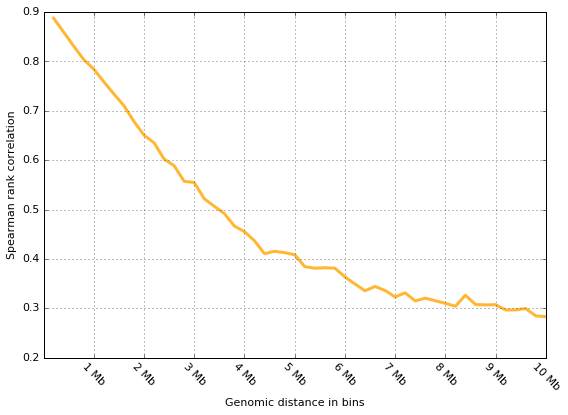

In [36]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

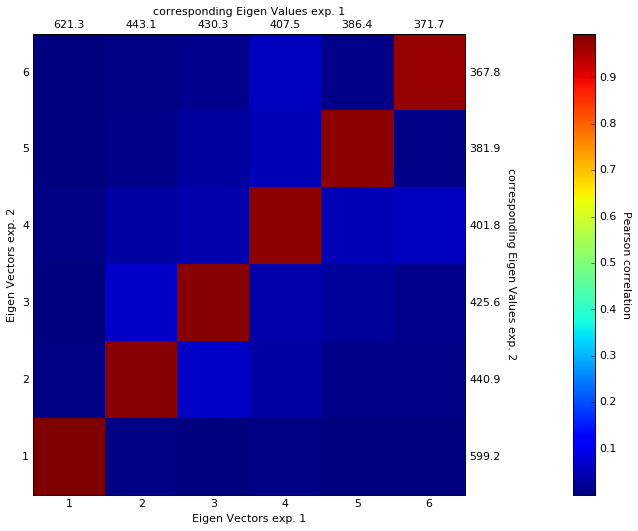

0.994 0.005 0.001 0.007 0.003 0.002

0.005 0.985 0.063 0.034 0.008 0.011

0.000 0.064 0.983 0.039 0.027 0.015

0.007 0.033 0.039 0.981 0.048 0.056

0.003 0.010 0.029 0.049 0.981 0.008

0.002 0.007 0.013 0.056 0.012 0.972



In [37]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto')

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

### NcoI

In [38]:
renz1 = 'NcoI'
renz2 = 'NcoI'
rep1  = 'T0'
rep2  = 'T60'

In [39]:
hic_data1 = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz1, rep1),
    resolution=reso)
hic_data2 = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz2, rep2),
    resolution=reso)

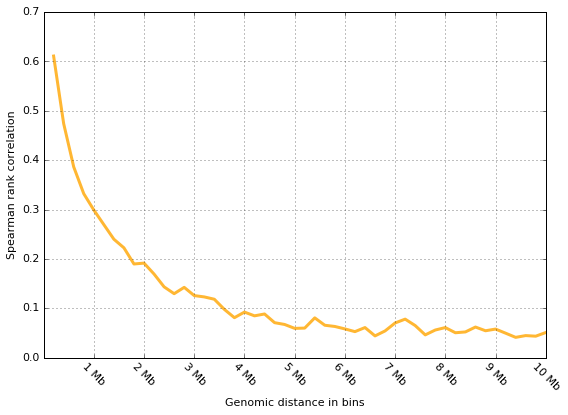

In [40]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

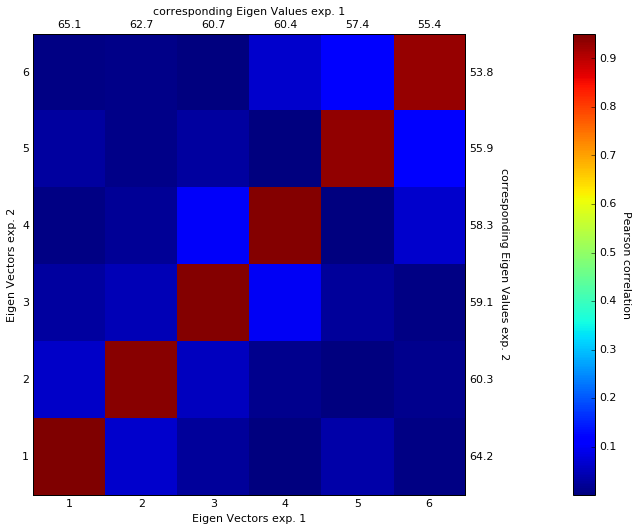

0.950 0.065 0.024 0.001 0.035 0.007

0.063 0.941 0.053 0.015 0.001 0.014

0.028 0.046 0.946 0.101 0.026 0.005

0.006 0.022 0.102 0.945 0.002 0.066

0.028 0.008 0.030 0.002 0.932 0.119

0.008 0.011 0.001 0.065 0.120 0.929



In [41]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto')

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

## Between replicates with different restriction enzymes

### T0

In [42]:
renz1 = 'HindIII'
renz2 = 'NcoI'
rep1  = 'T0'
rep2  = 'T0'

In [43]:
hic_data1 = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz1, rep1),
    resolution=reso)
hic_data2 = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz2, rep2),
    resolution=reso)

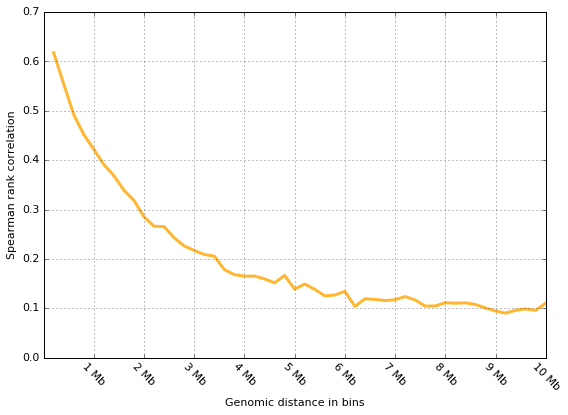

In [44]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

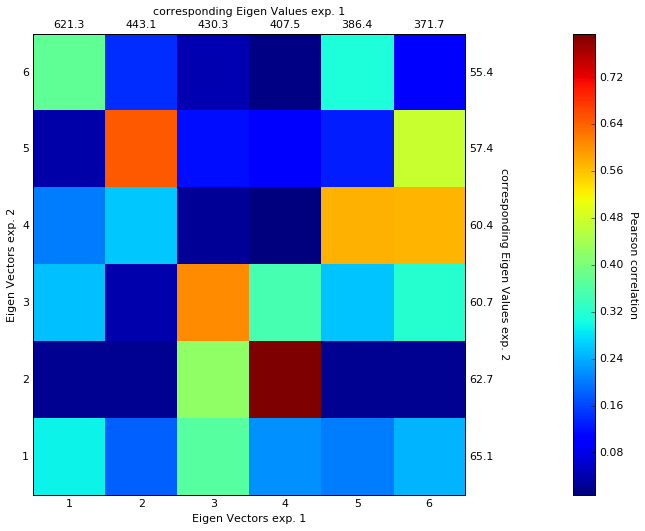

0.296 0.180 0.366 0.219 0.203 0.245

0.022 0.021 0.422 0.794 0.021 0.021

0.254 0.039 0.605 0.350 0.259 0.319

0.202 0.262 0.024 0.008 0.574 0.571

0.036 0.647 0.117 0.098 0.130 0.472

0.375 0.141 0.042 0.011 0.310 0.104



In [45]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto')

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

### T60

In [46]:
renz1 = 'HindIII'
renz2 = 'NcoI'
rep1  = 'T60'
rep2  = 'T60'

In [47]:
hic_data1 = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz1, rep1),
    resolution=reso)
hic_data2 = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz2, rep2),
    resolution=reso)

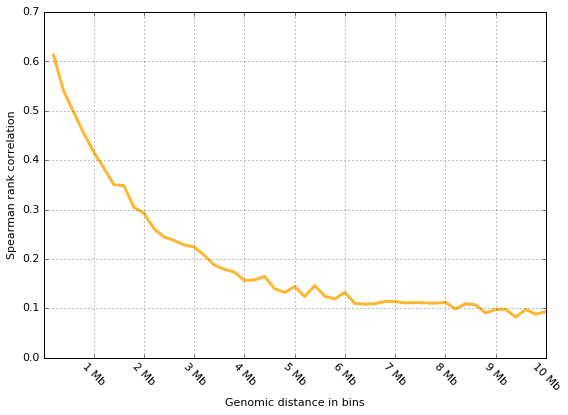

In [48]:
## this part is to "tune" the plot ##
plt.figure(figsize=(9, 6))
axe = plt.subplot()
axe.grid()
axe.set_xticks(range(0, 55, 5))
axe.set_xticklabels(['%d Mb' % int(i * 0.2) if i else '' for i in range(0, 55, 5)], rotation=-45)
#####################################

_ = correlate_matrices(hic_data1, hic_data2, max_dist=50, show=False, axe=axe)

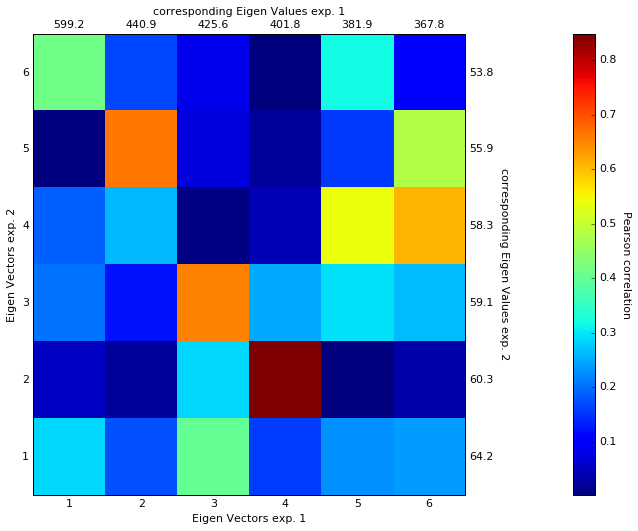

0.288 0.175 0.401 0.159 0.228 0.239

0.054 0.024 0.288 0.848 0.003 0.035

0.204 0.123 0.656 0.249 0.294 0.266

0.190 0.262 0.009 0.044 0.538 0.607

0.006 0.665 0.073 0.025 0.155 0.479

0.413 0.168 0.084 0.002 0.319 0.109



In [49]:
corrs = eig_correlate_matrices(hic_data1, hic_data2, show=True, aspect='auto')

for cor in corrs:
    print ' '.join(['%5.3f' % (c) for c in cor]) + '\n'

# Merge Hi-C experiments

Once agreed that experiments are similar, they can be merged.

Here is a simple way to merge valid pairs. Arguably we may want to merge unfiltered data but the difference would be minimal specially with non-replicates.

In [1]:
from pytadbit.mapping import merge_2d_beds

/home/fransua/.miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:
renz1 = 'HindIII'
renz2 = 'NcoI'
rep   = 'T60'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz1, rep)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz2, rep)
hic_data  = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}.tsv'.format(rep)

merge_2d_beds(hic_data1, hic_data2, hic_data)

In [ ]:
renz1 = 'HindIII'
renz2 = 'NcoI'
rep   = 'T0'

hic_data1 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz1, rep)
hic_data2 = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(renz2, rep)
hic_data  = 'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}.tsv'.format(rep)

merge_2d_beds(hic_data1, hic_data2, hic_data)